# **Лабораторная работа №1: Первичное исследование данных**

##**1.Постановка задачи**

### **Описание датасета:**
Это набор данных о фитнес-активности и показателях здоровья участников, собираемый с помощью носимых устройств и приложений для отслеживания здоровья различных пользователей за пятилетний период. Датчики фиксируют физическую активность, сердечный ритм, качество сна, уровень стресса и другие биометрические показатели. Данные содержат временные метки, что позволяет анализировать динамику изменения показателей во времени для каждого участника.

### **Условный заказчик:**

**1. Команда разработки фитнес-приложения или носимого устройства.** Им нужны данные для улучшения персонализированных рекомендаций и повышения точности измерений.

**2. Фитнес-клубы и персональные тренеры.** Данные необходимы для анализа эффективности тренировок и составления индивидуальных программ.

**3. Медицинские исследовательские организации.** Могут использовать данные для изучения взаимосвязи между физической активностью и показателями здоровья.

### **Возможные задачи ИАД:**

**1. Классификация пользователей по уровню в фитнесе.** Автоматическое определение уровня физической подготовки на основе показателей активности, с целью персонализировать уведомления и рекомендации.

**2. Прогнозирование расхода калорий.** Можно построить модель предсказывающую количество сожжённых калорий на основе типа активности, её продолжительности и интенсивности.

**3. Выявление аномалий в показателях здоровья.** Обнаружение необычных значений сердечного ритма, артериального давления или других метрик, которые могут указывать на проблемы со здоровьем.

## **2. Паспорт датасета**

### **Загрузка данных**


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
df = pd.read_csv('health_fitness_dataset.csv', sep=',')  # Путь к вашему файлу
print(f'Размер датасета: {df.shape[0]} строк, {df.shape[1]} столбцов')
df.head()

Размер датасета: 687701 строк, 23 столбцов


,participant_id,date,age,gender,height_cm,weight_kg,bmi,activity_type,duration_minutes,intensity,...,resting_heart_rate,blood_pressure_systolic,blood_pressure_diastolic,endurance_level,sleep_hours,stress_level,hydration_level,smoking_status,health_condition,fitness_level
0,1,2024/1/1,56,F,165.3,50.55,18.50,Dancing,42.1,Low,...,69.5,110.7,72.9,5.37,6.6,4,1.5,Never,NaN,0.04
1,1,2024/1/4,56,F,165.3,55.38,20.27,Swimming,66.9,Low,...,69.5,110.7,72.9,5.39,8.1,3,1.8,Never,NaN,0.07
2,1,2024/1/5,56,F,165.3,56.49,20.68,Swimming,20.0,Medium,...,69.5,110.7,72.9,5.42,6.2,5,2.7,Never,NaN,0.09
3,1,2024/1/7,56,F,165.3,52.23,19.12,Weight Training,23.5,Medium,...,69.5,110.7,72.9,5.44,7.2,4,2.6,Never,NaN,0.21
4,1,2024/1/9,56,F,165.3,53.96,19.75,Swimming,75.0,Medium,...,69.5,110.7,72.9,5.47,7.1,7,1.5,Never,NaN,0.33


### **Структура данных**

In [8]:
print("Информация о столбцах и типах")
df.info()

print("\nПодробная информация о каждом признаке:")
columns_info = []

for col in df.columns:
    # Определяем тип признака
    dtype = str(df[col].dtype)
    # Считаем уникальные значения
    unique_count = df[col].nunique()

    # Берем примеры значений
    if unique_count <= 5:
        examples = list(df[col].dropna().unique()[:5])
    else:
        examples = list(df[col].dropna().unique()[:3]) + ["..."]

    # Предполагаемый смысл
    meaning = ""
    if 'id' in col.lower():
        meaning = "Уникальный идентификатор участника"
    elif 'date' in col.lower():
        meaning = "Дата измерения"
    elif 'age' in col.lower():
        meaning = "Возраст участника"
    elif 'gender' in col.lower():
        meaning = "Пол участника"
    elif 'height' in col.lower():
        meaning = "Рост в сантиметрах"
    elif 'weight' in col.lower():
        meaning = "Вес в килограммах"
    elif 'bmi' in col.lower():
        meaning = "Индекс массы тела"
    elif 'activity' in col.lower():
        meaning = "Тип физической активности"
    elif 'duration' in col.lower():
        meaning = "Продолжительность активности в минутах"
    elif 'intensity' in col.lower():
        meaning = "Интенсивность активности"
    elif 'calories' in col.lower():
        meaning = "Сожжённые калории"
    elif 'avg' in col.lower():
        meaning = "Показатели средней частоты сердцебиения"
    elif 'resting' in col.lower():
        meaning = "Показатели частоты сердцебиения в покое"
    elif 'systolic' in col.lower():
        meaning = "Систолическое артериальное давление"
    elif 'diastolic' in col.lower():
        meaning = "Диастолическое артериальное давление"
    elif 'sleep' in col.lower():
        meaning = "Количество часов сна"
    elif 'stress' in col.lower():
        meaning = "Уровень стресса"
    elif 'daily_steps' in col.lower():
        meaning = "Количество пройденных шагов"
    elif 'endurance' in col.lower():
        meaning = "Уровень выносливости"
    elif 'hydration' in col.lower():
        meaning = "Уровень гидротации"
    elif 'smoking' in col.lower():
        meaning = "Статус курящего"
    elif 'health_condition' in col.lower():
        meaning = "Состояние здоровья"
    elif 'fitness' in col.lower():
        meaning = "Уровень физической подотовки"

    columns_info.append({
        'Признак': col,
        'Тип': dtype,
        'Уникальных значений': unique_count,
        'Примеры значений': examples,
        'Предполагаемый смысл': meaning
    })

columns_df = pd.DataFrame(columns_info)
print(columns_df.to_string(index=False))

print("\nСтатистика по числовым признакам")
df.describe()

Информация о столбцах и типах
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687701 entries, 0 to 687700
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   participant_id            687701 non-null  int64  
 1   date                      687701 non-null  object 
 2   age                       687701 non-null  int64  
 3   gender                    687701 non-null  object 
 4   height_cm                 687701 non-null  float64
 5   weight_kg                 687701 non-null  float64
 6   bmi                       687701 non-null  float64
 7   activity_type             687701 non-null  object 
 8   duration_minutes          687701 non-null  float64
 9   intensity                 687701 non-null  object 
 10  calories_burned           687701 non-null  float64
 11  daily_steps               687701 non-null  int64  
 12  avg_heart_rate            687701 non-null  int64  
 13  resting_heart_

,participant_id,age,height_cm,weight_kg,bmi,duration_minutes,calories_burned,daily_steps,avg_heart_rate,resting_heart_rate,blood_pressure_systolic,blood_pressure_diastolic,endurance_level,sleep_hours,stress_level,hydration_level,fitness_level
count,687701.000000,687701.000000,687701.000000,687701.000000,687701.000000,687701.000000,687701.000000,687701.000000,687701.000000,687701.000000,687701.000000,687701.000000,687701.000000,687701.000000,687701.000000,687701.000000,687701.000000
mean,1499.781828,41.658602,168.587699,61.728155,21.663562,74.026662,15.381302,8628.370918,131.454165,70.010547,120.001260,80.188079,9.492198,7.048799,5.472029,2.499427,9.524900
std,865.997215,13.581770,9.140811,8.547730,1.939251,35.095472,9.985552,2054.756608,17.814744,5.074563,10.008917,8.239418,2.246180,0.972068,1.914969,0.579050,5.502485
min,1.000000,18.000000,145.000000,39.760000,18.500000,20.000000,0.800000,-419.000000,82.000000,51.100000,78.000000,53.700000,4.530000,4.000000,1.000000,1.500000,0.020000
25%,749.000000,30.000000,161.700000,55.500000,20.060000,46.300000,7.800000,7203.000000,118.000000,66.500000,113.100000,74.600000,7.820000,6.400000,4.000000,2.000000,4.770000
50%,1499.000000,42.000000,168.200000,61.060000,21.640000,72.800000,13.000000,8607.000000,130.000000,70.000000,120.200000,80.100000,9.460000,7.000000,5.000000,2.500000,9.510000
75%,2249.000000,53.000000,175.300000,67.310000,23.270000,99.500000,20.700000,10027.000000,144.000000,73.500000,127.000000,85.700000,11.050000,7.700000,7.000000,3.000000,14.230000
max,3000.000000,64.000000,198.500000,98.110000,24.900000,152.100000,92.000000,17241.000000,206.000000,87.100000,152.700000,112.100000,18.840000,10.000000,10.000000,3.500000,21.930000


`participant_id` — идентификаторы распределены равномерно (1-3000), охватывают 3000 участников, среднее значение 1499.8 близко к медиане 1499.  
`age` — возраст от 18 до 64 лет, средний 41.7 года, распределение симметричное (среднее и медиана близки).  
`height_cm` — рост от 145 до 198.5 см, средний 168.6 см, стандартное отклонение 9.1 см соответствует нормальной вариативности в рассмотриваемой группе.  
`weight_kg` — вес от 39.76 до 98.11 кг, средний 61.73 кг, медиана 61.06 кг показывает симметричное распределение.  
`bmi` — ИМТ от 18.5 до 24.9, все значения в диапазоне нормального веса, среднее 21.66 соответствует здоровому весу.  
`duration_minutes` — продолжительность активности от 20 до 152.1 минут, среднее 74 минуты, разброс 35.1 отражает разнообразие тренировок.  
`calories_burned` — расход калорий от 0.8 до 92, среднее 15.38, высокое стандартное отклонение 9.99 указывает на большую вариативность в зависимости от активности.  
`daily_steps` — есть проблема: отрицательное минимальное значение (-419 шагов) — явная ошибка измерения; максимальное 17241 шага реалистично для активных людей.  
`avg_heart_rate` — средний пульс от 82 до 206 уд/мин, максимальное значение 206 уд/мин.  
`resting_heart_rate` — пульс в покое от 51.1 до 87.1 уд/мин, среднее 70 уд/мин в пределах нормы.  
`blood_pressure_systolic` — систолическое артериальное давление от 78 до 152.7 мм рт.ст., среднее 120 мм рт.ст. — нормальное значение.  
`blood_pressure_diastolic` — диастолическое артериальное давление от 53.7 до 112.1 мм рт.ст., среднее 80.2 мм рт.ст. соответствует норме.  
`endurance_level` — уровень выносливости от 4.53 до 18.84, среднее 9.49, широкий диапазон отражает разную подготовку.  
`sleep_hours` — сон от 4 до 10 часов, среднее 7.05 часов соответствует рекомендациям по здоровому сну.  
`stress_level` — уровень стресса от 1 до 10, среднее 5.47 указывает на умеренный стресс у участников.  
`hydration_level` — уровень гидратации от 1.5 до 3.5.  
`fitness_level` — уровень физической подготовки от 0.02 до 21.93, среднее 9.52, высокое стандартное отклонение 5.5 показывает большую вариативность подготовки.  

In [9]:
print("\nПреобразование типов данных:")
if 'date' in df.columns:
    try:
        df['date'] = pd.to_datetime(df['date'])
        print(f"Столбец 'date' преобразован в формат datetime")
    except:
        print(f"Не удалось преобразовать столбец 'date'")

# категориальные признаки
categorical_cols = ['gender', 'activity_type', 'intensity', 'smoking_status', 'health_condition']
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].astype('category')
        print(f"Столбец '{col}' преобразован в категориальный тип")

print("\nОбновлённая информация о типах:")
print(df.dtypes)


Преобразование типов данных:
Столбец 'date' преобразован в формат datetime
Столбец 'gender' преобразован в категориальный тип
Столбец 'activity_type' преобразован в категориальный тип
Столбец 'intensity' преобразован в категориальный тип
Столбец 'smoking_status' преобразован в категориальный тип
Столбец 'health_condition' преобразован в категориальный тип

Обновлённая информация о типах:
participant_id                       int64
date                        datetime64[ns]
age                                  int64
gender                            category
height_cm                          float64
weight_kg                          float64
bmi                                float64
activity_type                     category
duration_minutes                   float64
intensity                         category
calories_burned                    float64
daily_steps                          int64
avg_heart_rate                       int64
resting_heart_rate                 float64
blood_

## **3. Аудит качества данных**




### **3.1 Пропуски**

In [10]:
# Пропуски по столбцам
missing = pd.DataFrame({
    'Пропуски': df.isnull().sum(),
    'Доля (%)': (df.isnull().sum() / len(df) * 100).round(2)
}).sort_values('Пропуски', ascending=False)

print(missing)

print("\nАнализ наиболее проблемных столбцов:")
missing[missing['Пропуски'] > 0]

                          Пропуски  Доля (%)
health_condition            490275     71.29
date                             0      0.00
participant_id                   0      0.00
gender                           0      0.00
height_cm                        0      0.00
weight_kg                        0      0.00
age                              0      0.00
bmi                              0      0.00
activity_type                    0      0.00
intensity                        0      0.00
duration_minutes                 0      0.00
daily_steps                      0      0.00
avg_heart_rate                   0      0.00
resting_heart_rate               0      0.00
calories_burned                  0      0.00
blood_pressure_systolic          0      0.00
blood_pressure_diastolic         0      0.00
sleep_hours                      0      0.00
endurance_level                  0      0.00
stress_level                     0      0.00
hydration_level                  0      0.00
smoking_st

,Пропуски,Доля (%)
health_condition,490275,71.29


**Вывод:**

Пропуски содержит только один столбец из 23.

**`health_condition`** содержит 71.29% пропусков (490 275 из 687 701 строк).
Это *критическая* проблема, поскольку почти 3/4 данных отсутствуют. Данный столбец содержит информацию о состоянии здоровья участников, что важно для медицинского анализа.

Возможная причина: не все участники указали информацию о состоянии своего здоровья. Это серьёзно влияет на ограничение медицинского анализа и прогнозирование рисков.  

Качество данных по остальным признакам отличное.

### **3.2 Дубликаты**

In [11]:
duplicates = df.duplicated().sum()
print(f'Полных дубликатов строк: {duplicates}')
print(f"Доля от общего числа строк: {round(duplicates/len(df)*100, 2)}%")


Полных дубликатов строк: 0
Доля от общего числа строк: 0.0%


### **3.3 Типические проблемы значений**

In [12]:
# Разделяем признаки на числовые и категориальные
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print(f"Числовых признаков: {len(numeric_cols)}")
print(f"Категориальных признаков: {len(categorical_cols)}")

print("\nАнализ числовых признаков:")
numeric_stats = pd.DataFrame(index=numeric_cols)
numeric_stats['Тип'] = df[numeric_cols].dtypes
numeric_stats['Min'] = df[numeric_cols].min()
numeric_stats['Max'] = df[numeric_cols].max()
numeric_stats['Mean'] = df[numeric_cols].mean().round(2)
numeric_stats['Std'] = df[numeric_cols].std().round(2)
numeric_stats['Медиана'] = df[numeric_cols].median()

# Проверка на аномальные значения
def check_anomalies(series, col_name):
    anomalies = []
    if 'age' in col_name.lower():
        if (series < 0).any():
            anomalies.append("Отрицательный возраст")
        if (series > 120).any():
            anomalies.append("Возраст > 120 лет")

    elif 'height' in col_name.lower():
        if (series < 50).any():
            anomalies.append("Рост < 50 см")
        if (series > 250).any():
            anomalies.append("Рост > 250 см")

    elif 'weight' in col_name.lower():
        if (series < 20).any():
            anomalies.append("Вес < 20 кг")
        if (series > 300).any():
            anomalies.append("Вес > 300 кг")

    elif 'bmi' in col_name.lower():
        if (series < 16).any():
            anomalies.append("ИМТ < 16 (истощение)")
        if (series > 40).any():
            anomalies.append("ИМТ >40 (ожирение)")

    elif 'steps' in col_name.lower():
        if (series < 0).any():
            anomalies.append("Шаги < 0")

    elif 'heart' in col_name.lower():
        if (series < 40).any():
            anomalies.append("ЧСС < 40 уд/мин")
        if (series > 180).any():
            anomalies.append("ЧСС > 180 уд/мин")
    return ', '.join(anomalies) if anomalies else "Нет аномалий"

numeric_stats['Проверка аномалий'] = [check_anomalies(df[col], col) for col in numeric_cols]
print(numeric_stats.to_string())

print("\nАнализ категориальных признаков:")
for col in categorical_cols:
    print(f"\nАнализ столбца: {col}")
    print(f"Тип данных: {df[col].dtype}")
    print(f"Уникальных значений: {df[col].nunique()}")
    # Пропуски (если есть)
    missing = df[col].isnull().sum()
    if missing > 0:
        print(f"   Пропусков: {missing} ({round(missing/len(df)*100, 2)}%)")

    value_counts = df[col].value_counts().head(5)
    print(f"   Топ-5 значений:")
    for value, count in value_counts.items():
        percentage = round(count/len(df)*100, 2)
        print(f"     * '{value}': {count} ({percentage}%)")

    # Проверка на "грязные" категории
    if df[col].dtype == 'object':
        # регистр
        unique_lower = set(str(x).lower().strip() for x in df[col].dropna().unique())
        if len(unique_lower) < df[col].nunique():
            print(f"Возможная проблема с регистром: {len(unique_lower)} уникальных значений после приведения к нижнему регистру")

        # пробелы в начале/конце
        has_whitespace = any(str(x).startswith(' ') or str(x).endswith(' ')
                           for x in df[col].dropna().unique() if isinstance(x, str))
        if has_whitespace:
            print(f"Найдены значения с лишними пробелами")

Числовых признаков: 17
Категориальных признаков: 5

Анализ числовых признаков:
                              Тип     Min       Max     Mean      Std  Медиана Проверка аномалий
participant_id              int64    1.00   3000.00  1499.78   866.00  1499.00      Нет аномалий
age                         int64   18.00     64.00    41.66    13.58    42.00      Нет аномалий
height_cm                 float64  145.00    198.50   168.59     9.14   168.20      Нет аномалий
weight_kg                 float64   39.76     98.11    61.73     8.55    61.06      Нет аномалий
bmi                       float64   18.50     24.90    21.66     1.94    21.64      Нет аномалий
duration_minutes          float64   20.00    152.10    74.03    35.10    72.80      Нет аномалий
calories_burned           float64    0.80     92.00    15.38     9.99    13.00      Нет аномалий
daily_steps                 int64 -419.00  17241.00  8628.37  2054.76  8607.00          Шаги < 0
avg_heart_rate              int64   82.00    206

### **3.4. Выбросы**

Выбросов по методу IQR: 1867


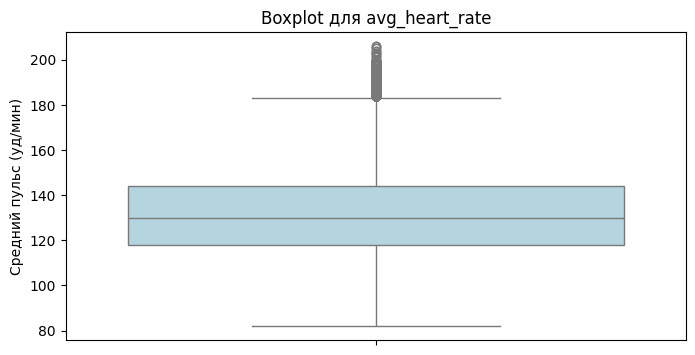


Информация о выбросах:
Минимальное значение в выбросах: 184.0
Максимальное значение в выбросах: 206.0
Среднее значение в выбросах: 187.8


In [13]:
#сред частотат сердцебиения
column = 'avg_heart_rate'
Q1 = df[column].quantile(0.25)
Q3 = df[column].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
print(f'Выбросов по методу IQR: {len(outliers)}')

# Визуализация
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, y=column,color='lightblue')
plt.title(f'Boxplot для {column}')
plt.ylabel('Средний пульс (уд/мин)')
plt.show()

print(f"\nИнформация о выбросах:")
print(f"Минимальное значение в выбросах: {outliers[column].min():.1f}")
print(f"Максимальное значение в выбросах: {outliers[column].max():.1f}")
print(f"Среднее значение в выбросах: {outliers[column].mean():.1f}")

**Выводы:**
* В avg_heart_rate обнаружены выбросы преимущественно в верхней части (>180 уд/мин).
* Высокие значения пульса могут быть как аномалиями, так и реальными значениями у спортсменов.

*Возможные причины:*
* Интенсивные тренировки
* Ошибки измерения датчиков
* Медицинские состояния
* Стрессовые ситуации во время измерений

## **4. Разведочный анализ (EDA)**

### **4.1. Распределение числового признака**

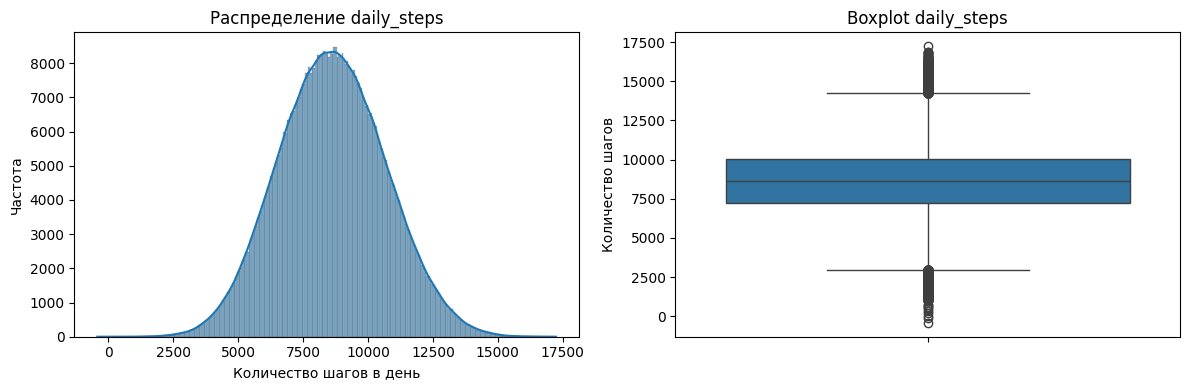

Медиана: 8607.00
Среднее: 8628.37
Стандартное отклонение: 2054.76
Асимметрия: 0.062


In [14]:
# Признак: пройденные шаги
numeric_col = 'daily_steps'

plt.figure(figsize=(12, 4))
#KDE
plt.subplot(1, 2, 1)
sns.histplot(df[numeric_col], kde=True)
plt.title(f'Распределение {numeric_col}')
plt.xlabel('Количество шагов в день')
plt.ylabel('Частота')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=df[numeric_col])
plt.title(f'Boxplot {numeric_col}')
plt.ylabel('Количество шагов')
plt.tight_layout()
plt.show()

print(f"Медиана: {df[numeric_col].median():.2f}")
print(f"Среднее: {df[numeric_col].mean():.2f}")
print(f"Стандартное отклонение: {df[numeric_col].std():.2f}")
print(f"Асимметрия: {df[numeric_col].skew():.3f}")

**Выводы:**

*Видно:*
* Распределение daily_steps близко к нормальному.
* Среднее (8628 шагов) и медиана (8607 шагов) почти совпадают.
* Большинство значений сосредоточено в диапазоне 6000-11000 шагов.
* На boxplot видны умеренные выбросы в верхней части.
* На boxplot заметны выбросы ниже 0, что говорит об явной ошибки измерения.

*Возможные гипотезы:*
* Большинство участников достигают рекомендованных 8000+ шагов в день.
* Есть группа "супер-активных" участников с 12000+ шагов.
* Распределение шагов достаточно однородное среди участников.

*Возникающие вопросы:*
* Есть ли взаимосвязь между daily_steps и другими показателями здоровья?
* Как распределение шагов отличается по возрастам или полу?


### **4.2. Анализ категориального признака**

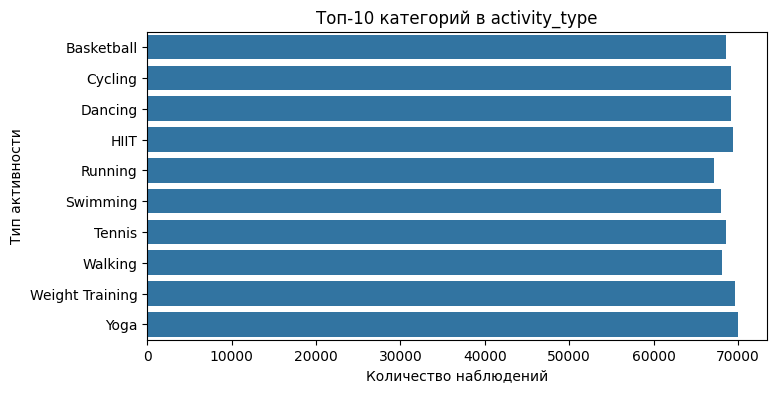

Всего уникальных типов активности: 10
Самые популярные активности:
1. Yoga: 69,961 наблюдений (10.17%)
2. Weight Training: 69,661 наблюдений (10.13%)
3. HIIT: 69,376 наблюдений (10.09%)
4. Dancing: 69,193 наблюдений (10.06%)
5. Cycling: 69,187 наблюдений (10.06%)


In [15]:
# Признак: физ активн
cat_col = 'activity_type'

plt.figure(figsize=(8, 4))
top_categories = df[cat_col].value_counts().head(10)
sns.barplot(x=top_categories.values, y=top_categories.index)
plt.title(f'Топ-10 категорий в {cat_col}')
plt.xlabel('Количество наблюдений')
plt.ylabel('Тип активности')
plt.show()

print(f"Всего уникальных типов активности: {df[cat_col].nunique()}")
print(f"Самые популярные активности:")
for i, (activity, count) in enumerate(df[cat_col].value_counts().head().items(), 1):
    percentage = (count / len(df) * 100)
    print(f"{i}. {activity}: {count:,} наблюдений ({percentage:.2f}%)")

**Выводы:**

*Видно:*
* Все 10 типов активности распределены практически равномерно.
* Наиболее популярные активности: Yoga (10.17%), Weight Training (10.13%), HIIT (10.09%).
* Отсутствует доминирующий тип активности - распределение сбалансированное.

*Возможные гипотезы:*
* Участники эксперимента разнообразят свои тренировки.
* Каждый тип активности имеет свою целевую аудиторию.
* Возможно, участники выбирают активности в зависимости от дня недели или настроения.

*Возникающие вопросы:*
* Как тип активности влияет на расход калорий?
* Есть ли предпочтения в типах активности по полу или возрасту?
* Как интенсивность тренировки связана с типом активности?

### **4.3. Анализ зависимости**

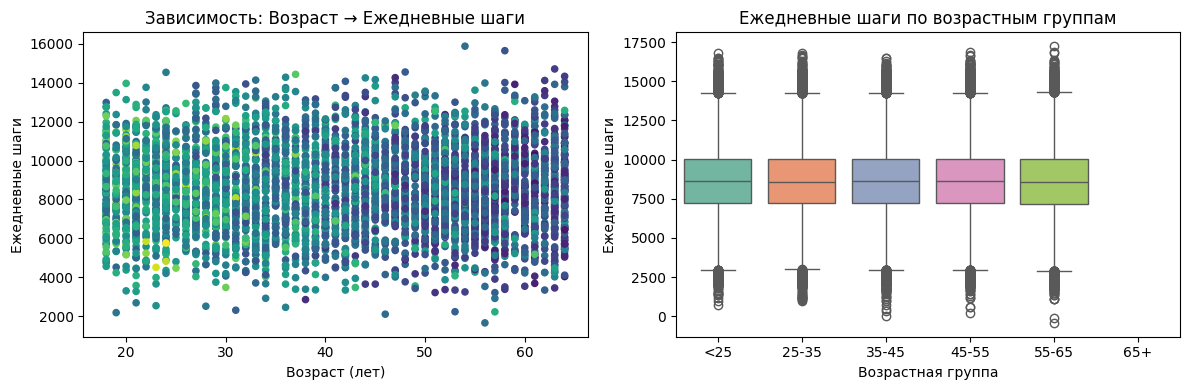

Статистика по возрастным группам:
             mean  median     std   count
age_group                                
<25        8632.0  8608.0  2054.0  112328
25-35      8623.6  8600.0  2050.7  137789
35-45      8631.1  8610.0  2055.2  147945
45-55      8632.3  8611.0  2054.4  147166
55-65      8623.3  8603.0  2059.2  142473


In [16]:
# Создаем возрастные группы
df['age_group'] = pd.cut(df['age'],
                         bins=[0, 25, 35, 45, 55, 65, 100],
                         labels=['<25', '25-35', '35-45', '45-55', '55-65', '65+'],
                         include_lowest=True)

# Признаки: возраст и ежедневные шаги
plt.figure(figsize=(12, 4))

# Scatter plot
plt.subplot(1, 2, 1)
# случайная выборка
sample_df = df.sample(n=5000, random_state=42)
scatter = plt.scatter(sample_df['age'], sample_df['daily_steps'],
                     c=sample_df['avg_heart_rate'],cmap='viridis', s=20)
plt.title('Зависимость: Возраст → Ежедневные шаги')
plt.xlabel('Возраст (лет)')
plt.ylabel('Ежедневные шаги')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x='age_group', y='daily_steps', data=df, hue='age_group', palette='Set2', dodge=False)
plt.title('Ежедневные шаги по возрастным группам')
plt.xlabel('Возрастная группа')
plt.ylabel('Ежедневные шаги')

plt.tight_layout()
plt.show()

print(f"Статистика по возрастным группам:")
age_group_stats = df.groupby('age_group', observed=True)['daily_steps'].agg(['mean', 'median', 'std', 'count'])
print(age_group_stats.round(1))

# Удаляем временный столбец
df.drop('age_group', axis=1, inplace=True)

**Выводы:**

*Видно:*
* На scatter plot видно, что с возрастом количество шагов немного снижается.
* В возрастной группе 25-35 лет наблюдается наибольшая вариативность в количестве шагов.
* Группа 55-65 лет показывает наиболее стабильные результаты.

*Возможные гипотезы:*
* Молодые участники (до 35 лет) более активны и имеют больший разброс в активности.
* После 55 лет активность становится более предсказуемой и стабильной.
* Возраст влияет на количество шагов, но не является единственным фактором.

*Возникающие вопросы:*
* Почему в группе 25-35 лет такой большой разброс в активности?
* Как другие факторы (пол, тип работы) влияют на эту зависимость?
* Есть ли оптимальный возраст для максимальной физической активности?

## **5. Выводы**


Детали в файле *`report/quality_report.md`*